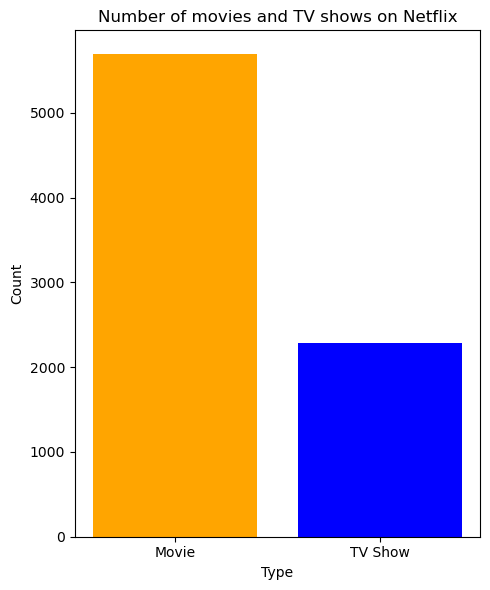

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('netflix_titles.csv')

df=df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts=df['type'].value_counts()
plt.figure(figsize=(5,6))
plt.bar(type_counts.index,type_counts.values,color=['orange','blue'])
plt.title('Number of movies and TV shows on Netflix')
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()


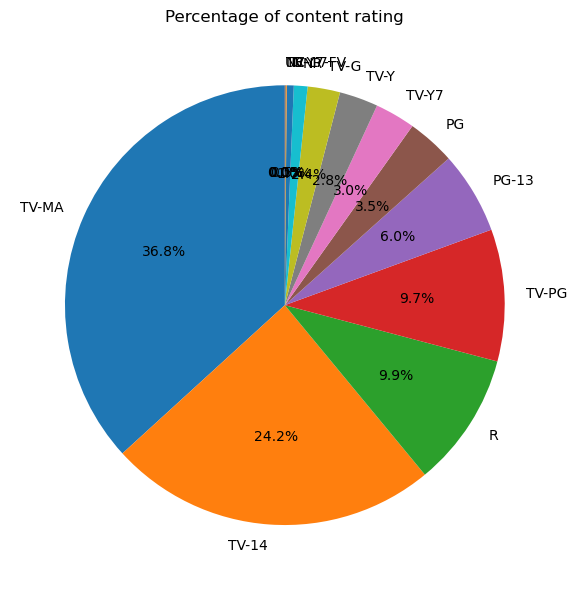

In [23]:
rating_count=df['rating'].value_counts()
plt.figure(figsize= (8,6))
plt.pie(rating_count, labels=rating_count.index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of content rating')

plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()

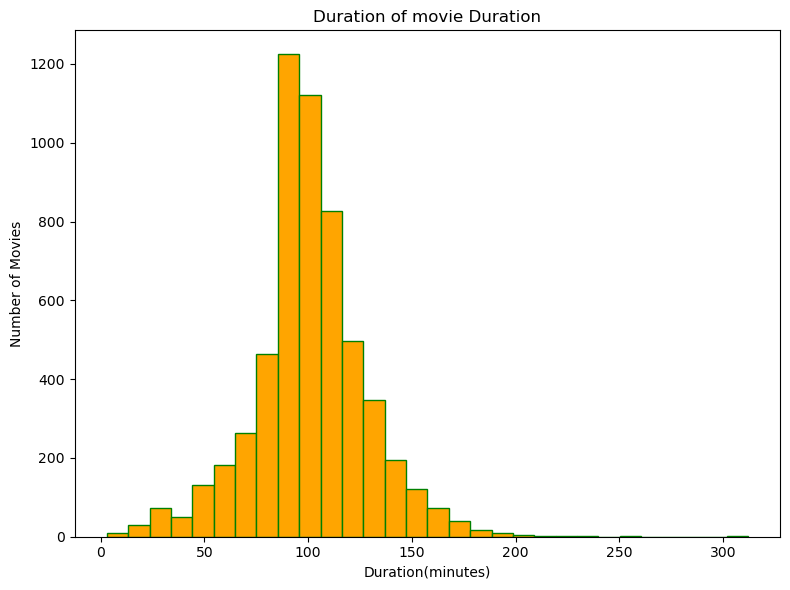

In [33]:
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']= movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color="orange" ,edgecolor='green')
plt.title('Duration of movie Duration')
plt.xlabel("Duration(minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig('movies_duration_hist.png')
plt.show()

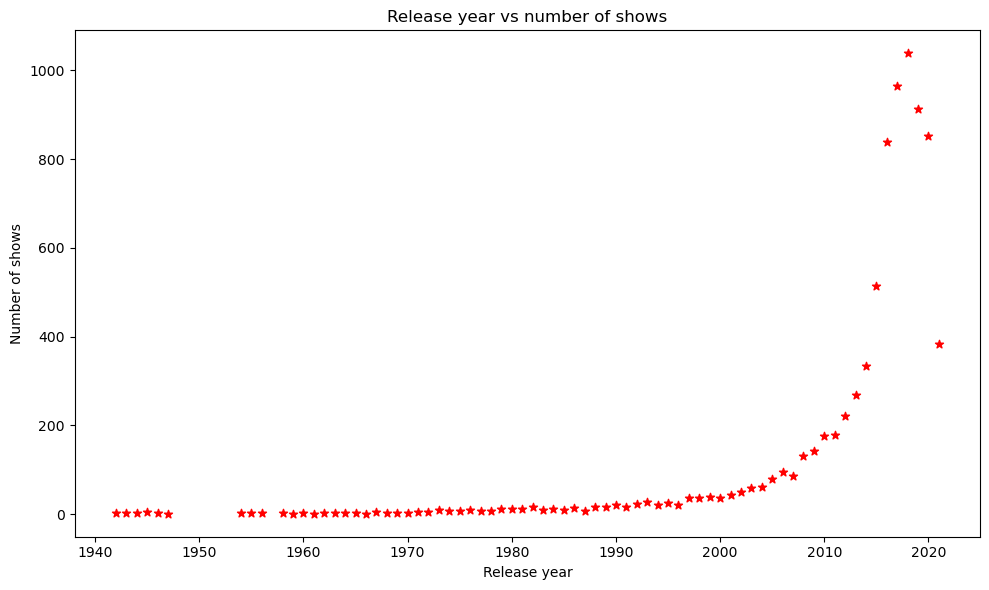

In [47]:
release_counts=df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,6) )
plt.scatter(release_counts.index,release_counts.values,color='red',marker='*')
plt.title('Release year vs number of shows')
plt.xlabel("Release year")
plt.ylabel("Number of shows")
plt.tight_layout()
plt.savefig('release_year_sct.png')
plt.show()

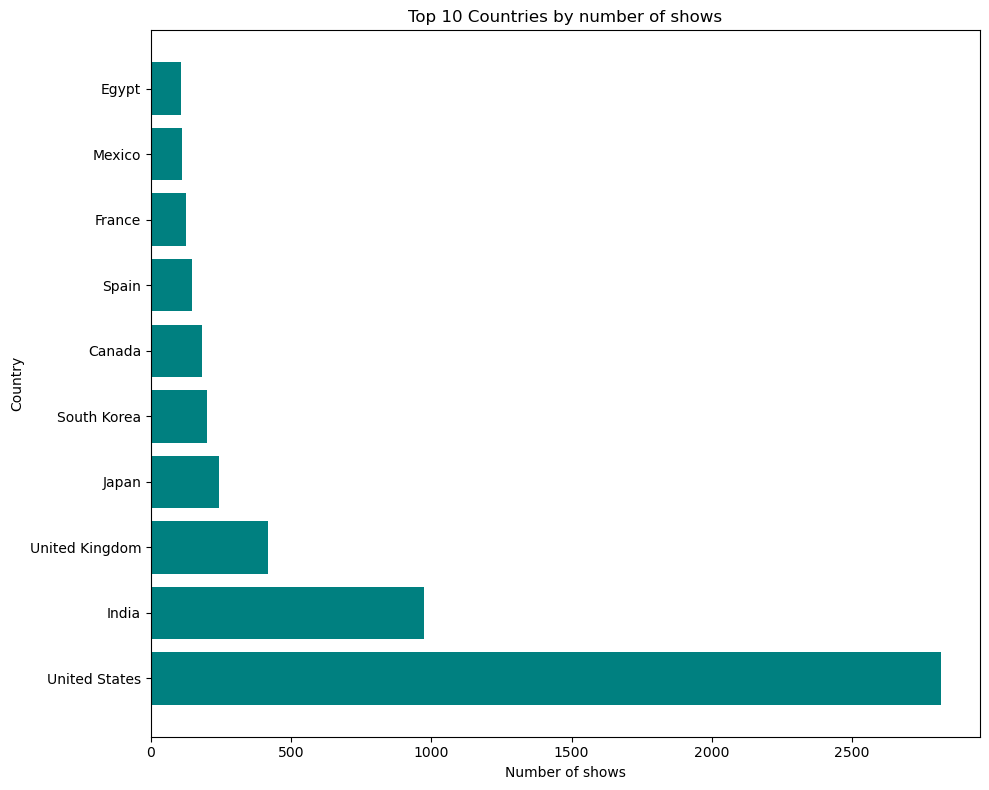

In [53]:
country_counts=df['country'].value_counts().head(10)

plt.figure(figsize=(10,8))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 Countries by number of shows')
plt.xlabel("Number of shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

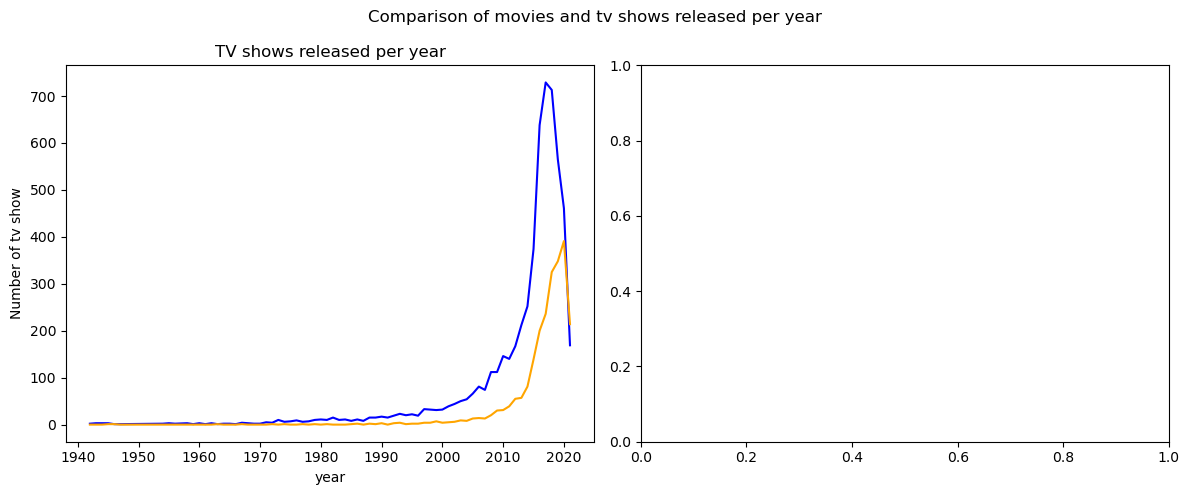

In [71]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig ,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(content_by_year.index,content_by_year['Movie'], color='blue')
ax[0].set_title('Movies released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Number of Movies')

ax[0].plot(content_by_year.index,content_by_year['TV Show'], color='orange')
ax[0].set_title('TV shows released per year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Number of tv show')

fig.suptitle('Comparison of movies and tv shows released per year')

plt.tight_layout()
plt.savefig('movies_tv_show_comparison.png')

plt.show()